<a href="https://colab.research.google.com/github/hongqin/Use-R-in-CoLab/blob/master/simple_stat_election20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
Election20df = read_csv("https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv")
head(Election20df)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  state_name = col_character(),
  county_fips = col_character(),
  county_name = col_character(),
  votes_gop = col_double(),
  votes_dem = col_double(),
  total_votes = col_double(),
  diff = col_double(),
  per_gop = col_double(),
  per_dem = col_double(),
  per_point_diff = col_double()
)




state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,01001,Autauga County,19838,7503,27770,12335,0.7143680,0.27018365,0.44418437
Alabama,01003,Baldwin County,83544,24578,109679,58966,0.7617137,0.22409030,0.53762343
Alabama,01005,Barbour County,5622,4816,10518,806,0.5345123,0.45788173,0.07663054
Alabama,01007,Bibb County,7525,1986,9595,5539,0.7842626,0.20698280,0.57727983
Alabama,01009,Blount County,24711,2640,27588,22071,0.8957155,0.09569378,0.80002175
Alabama,01011,Bullock County,1146,3446,4613,-2300,0.2484284,0.74701929,-0.49859094


In [3]:
# Question: What is the total number of votes? 

In [2]:
Election20df %>% select ( total_votes ) %>% sum()

sum( Election20df$total_votes ) /1E6

[1] 158433557

[1] 158.4336

# Question: What are the total number votes for GOP or DEM? 


In [4]:
Election20df %>% select ( votes_gop ) %>% sum()
Election20df %>% select ( votes_dem ) %>% sum()

[1] 74208196

[1] 81264994

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



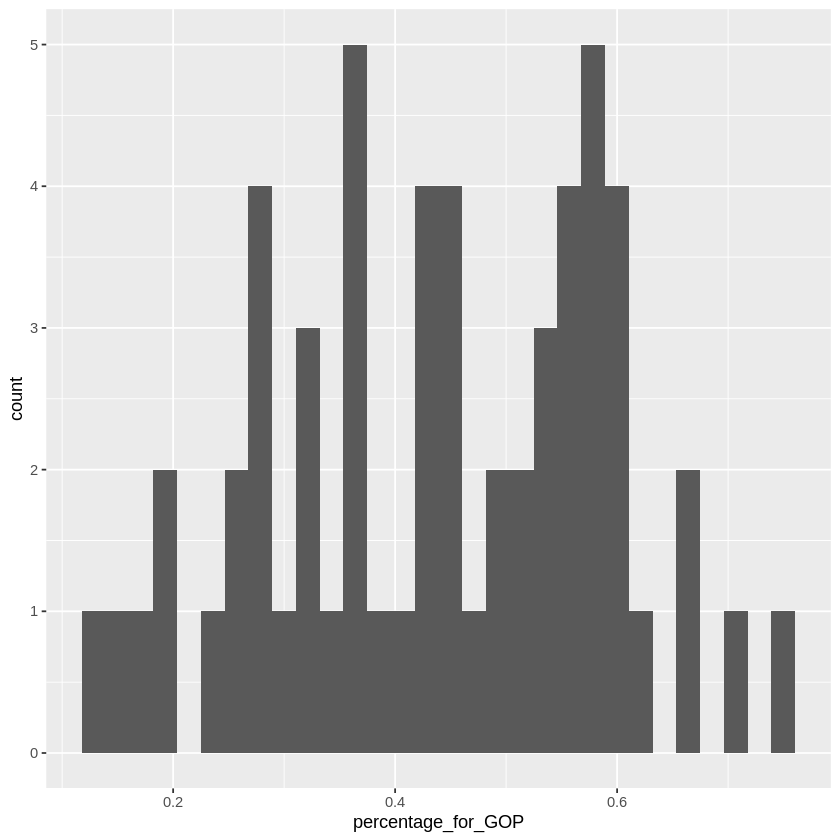

In [5]:
mystate = "California"
Californiadf <- 
  Election20df %>% filter( state_name == mystate) %>%  arrange( per_point_diff)

names( Californiadf )[8] = "percentage_for_GOP"

ggplot(Californiadf, aes(percentage_for_GOP)) +  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



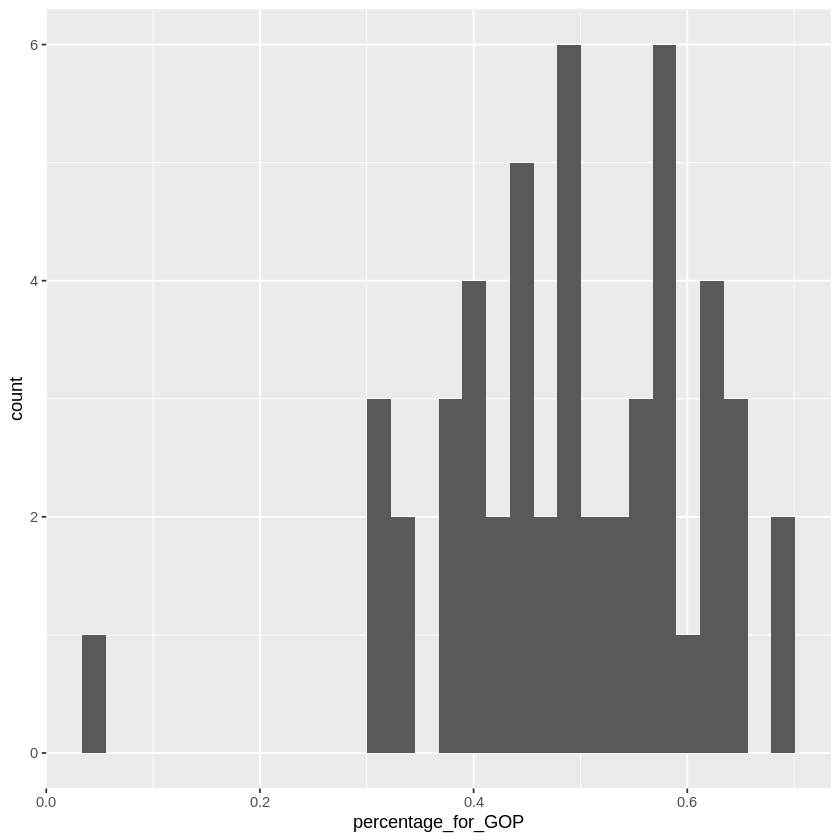

In [6]:
Statedf <- 
  Election20df %>% select( state_name, votes_gop, votes_dem,  total_votes ) %>% group_by( state_name ) %>% summarise_if( is.numeric, sum)

Statedf$percentage_for_GOP = Statedf$votes_gop / Statedf$total_votes

ggplot(Statedf, aes(percentage_for_GOP)) +  geom_histogram()

In [8]:
# Question: Find out which state has the nearly 95% DEM voting percentage? 

# There are many ways to do this. 
Statedf %>% filter( percentage_for_GOP < 0.1 )

state_name,votes_gop,votes_dem,total_votes,percentage_for_GOP
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
District of Columbia,18586,317323,344356,0.05397321


In [9]:
mean( Statedf$percentage_for_GOP) #average

[1] 0.4912157

In [10]:
quantile( Statedf$percentage_for_GOP )

0%        25%        50%        75%       100% 
0.05397321 0.40890356 0.49055981 0.57835322 0.69936227

# Label the states to deep red, red, swing, blue, deep blue

Reference: 
https://stackoverflow.com/questions/21050021/create-category-based-on-range-in-r


In [11]:

groups =  cut( Statedf$percentage_for_GOP, c(0, 0.4, 0.47, 0.53, 0.6, 1) )
levels(groups) =                   c("deepblue", "blue", "swing", "red", "deepred")
Statedf$groups = groups


In [12]:
Censusdf = read_csv("https://raw.githubusercontent.com/hongqin/USA-census-county-level/main/USA-County-level-census-2010-2019.csv")
head(Censusdf)


── Column specification ────────────────────────────────────────────────────────
cols(
  Location = col_character(),
  `2010` = col_number(),
  `2011` = col_number(),
  `2012` = col_number(),
  `2013` = col_number(),
  `2014` = col_number(),
  `2015` = col_number(),
  `2016` = col_number(),
  `2017` = col_number(),
  `2018` = col_number(),
  `2019` = col_number()
)




Location,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
"Autauga County, Alabama",54773,55227,54954,54727,54893,54864,55243,55390,55533,55869
"Baldwin County, Alabama",183112,186558,190145,194885,199183,202939,207601,212521,217855,223234
"Barbour County, Alabama",27327,27341,27169,26937,26755,26283,25806,25157,24872,24686
"Bibb County, Alabama",22870,22745,22667,22521,22553,22566,22586,22550,22367,22394
"Blount County, Alabama",57376,57560,57580,57619,57526,57526,57494,57787,57771,57826


In [13]:
Election20df$Location = paste( Election20df$county_name, Election20df$state_name, sep=", " )
Election20df$Location %in% Censusdf$Location

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [289]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [337]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [553]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [577]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [589]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [601]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRU

In [14]:
EleCen.df = merge( Election20df, Censusdf, by="Location")

In [16]:
Statedf2 <- EleCen.df %>% select( state_name, votes_gop, votes_dem,  total_votes, '2019' ) %>% group_by( state_name ) %>% summarise_if( is.numeric, sum)

head(Statedf2)
names( Statedf2)[5] = "population"

state_name,votes_gop,votes_dem,total_votes,2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,1441168,849648,2323304,4903185
Arizona,1661686,1672143,3387326,7278717
Arkansas,760647,423932,1219069,3017804
California,6005961,11109764,17495906,39512223
Colorado,1364607,1804352,3256953,5758736
Connecticut,715291,1080680,1824280,3565287


In [17]:
Statedf$population = Statedf2$population[match( Statedf$state_name , Statedf2$state_name ) ]

In [18]:
model1 = lm( Statedf$percentage_for_GOP ~ Statedf$population)
summary(model1)


Call:
lm(formula = Statedf$percentage_for_GOP ~ Statedf$population)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45310 -0.07174  0.01277  0.08058  0.19194 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.090e-01  2.288e-02  22.249   <2e-16 ***
Statedf$population -2.694e-09  2.330e-09  -1.156    0.253    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1205 on 48 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.0271,	Adjusted R-squared:  0.006827 
F-statistic: 1.337 on 1 and 48 DF,  p-value: 0.2533



Call:
lm(formula = Statedf$population ~ Statedf$groups)

Residuals:
     Min       1Q   Median       3Q      Max 
-9203097 -3224808 -1329480  1442048 31524696 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7987527    2093828   3.815 0.000413 ***
Statedf$groupsblue    -2375706    3121294  -0.761 0.450551    
Statedf$groupsswing    4295726    3121294   1.376 0.175550    
Statedf$groupsred     -3477533    2961120  -1.174 0.246413    
Statedf$groupsdeepred -5089577    3034245  -1.677 0.100402    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6944000 on 45 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.189,	Adjusted R-squared:  0.1169 
F-statistic: 2.621 on 4 and 45 DF,  p-value: 0.04717


Warning message:
“Removed 1 rows containing missing values (geom_point).”


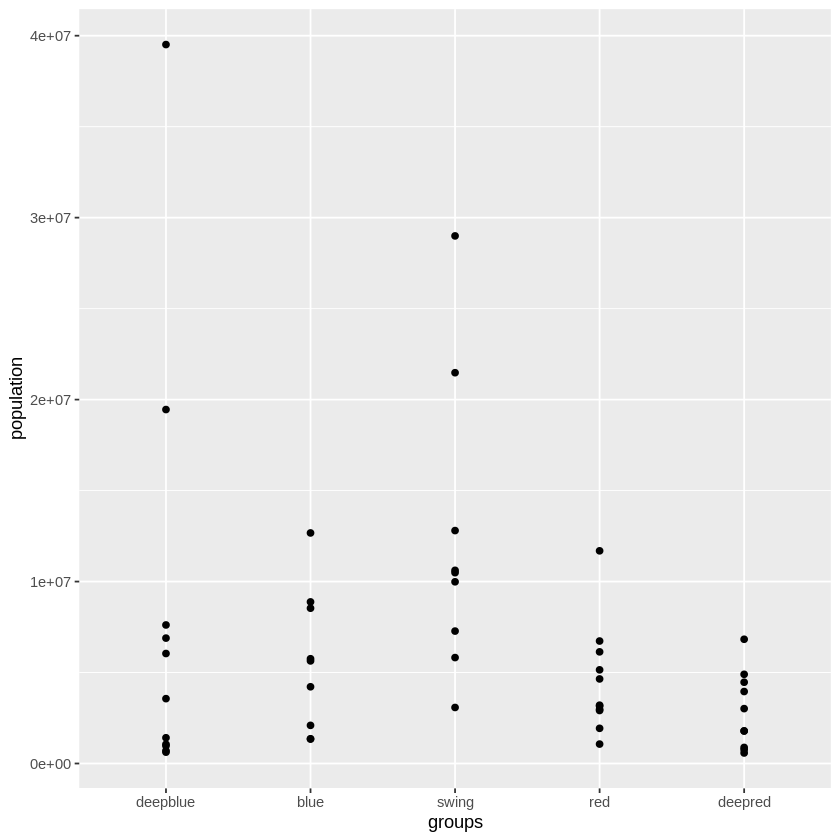

In [19]:
model2 = lm(  Statedf$population ~ Statedf$groups)
summary(model2)
ggplot( Statedf, aes(x=groups, y=population)) + geom_point()

In [20]:
StateArea = read_csv("https://raw.githubusercontent.com/hongqin/data-USstates/master/state-areas.csv")
names( StateArea) = c("state_name", "area")


── Column specification ────────────────────────────────────────────────────────
cols(
  state = col_character(),
  `area (sq. mi)` = col_double()
)




In [21]:
Statedf$area = StateArea$area[ match( Statedf$state_name  , StateArea$state_name ) ]
Statedf$pop_density = Statedf$population / Statedf$area

model = lm( Statedf$percentage_for_GOP ~ Statedf$pop_density)
summary(model)


Call:
lm(formula = Statedf$percentage_for_GOP ~ Statedf$pop_density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.199758 -0.083426 -0.004673  0.072517  0.190034 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.096e-01  1.457e-02  34.982  < 2e-16 ***
Statedf$pop_density -4.803e-05  9.760e-06  -4.921 1.05e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09961 on 48 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3354,	Adjusted R-squared:  0.3215 
F-statistic: 24.22 on 1 and 48 DF,  p-value: 1.053e-05


Warning message:
“Removed 1 rows containing missing values (geom_point).”


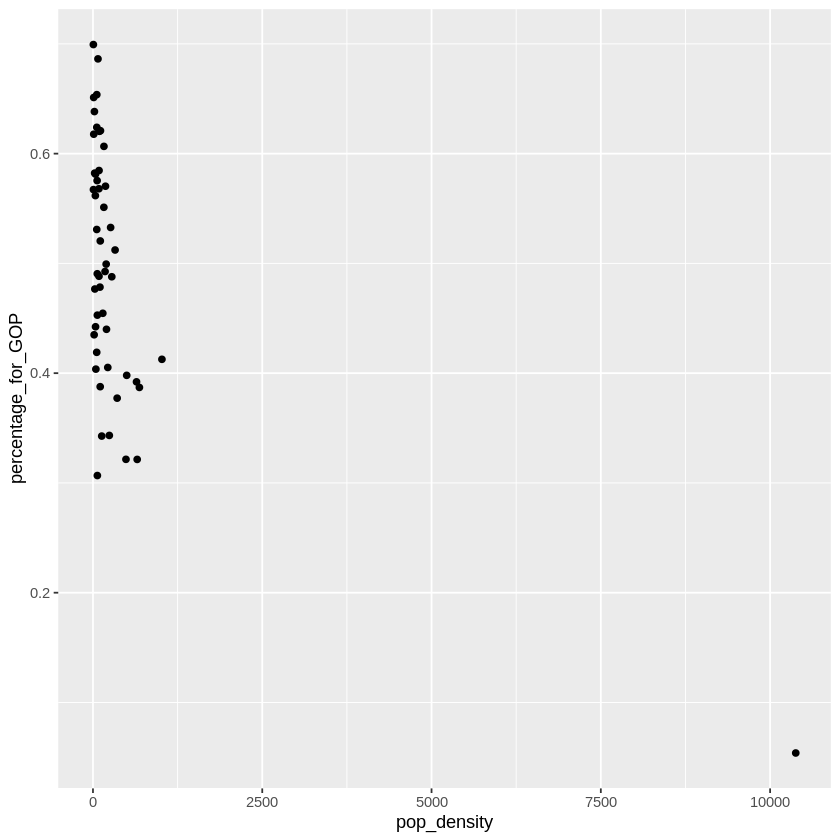

In [22]:
ggplot( Statedf, aes(x=pop_density, y=percentage_for_GOP)) + geom_point()

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


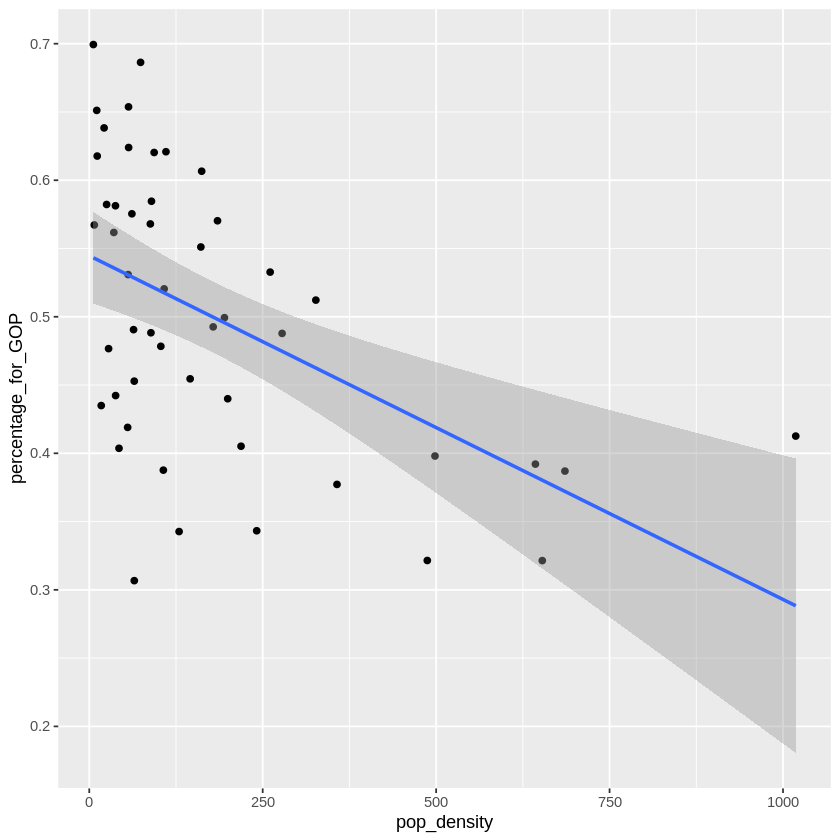

In [23]:
Statedf3 <- Statedf %>% filter( percentage_for_GOP > 0.1)

ggplot( Statedf3, aes(x=pop_density, y=percentage_for_GOP)) + 
  geom_point() + 
  geom_smooth(method='lm')

In [24]:
summary(lm(Statedf3$percentage_for_GOP~ Statedf3$pop_density))


Call:
lm(formula = Statedf3$percentage_for_GOP ~ Statedf3$pop_density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.221611 -0.061010  0.009291  0.062496  0.160249 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.447e-01  1.692e-02  32.200  < 2e-16 ***
Statedf3$pop_density -2.517e-04  6.178e-05  -4.075 0.000176 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09054 on 47 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.261,	Adjusted R-squared:  0.2453 
F-statistic:  16.6 on 1 and 47 DF,  p-value: 0.000176


Warning message:
“Removed 1 rows containing missing values (geom_point).”


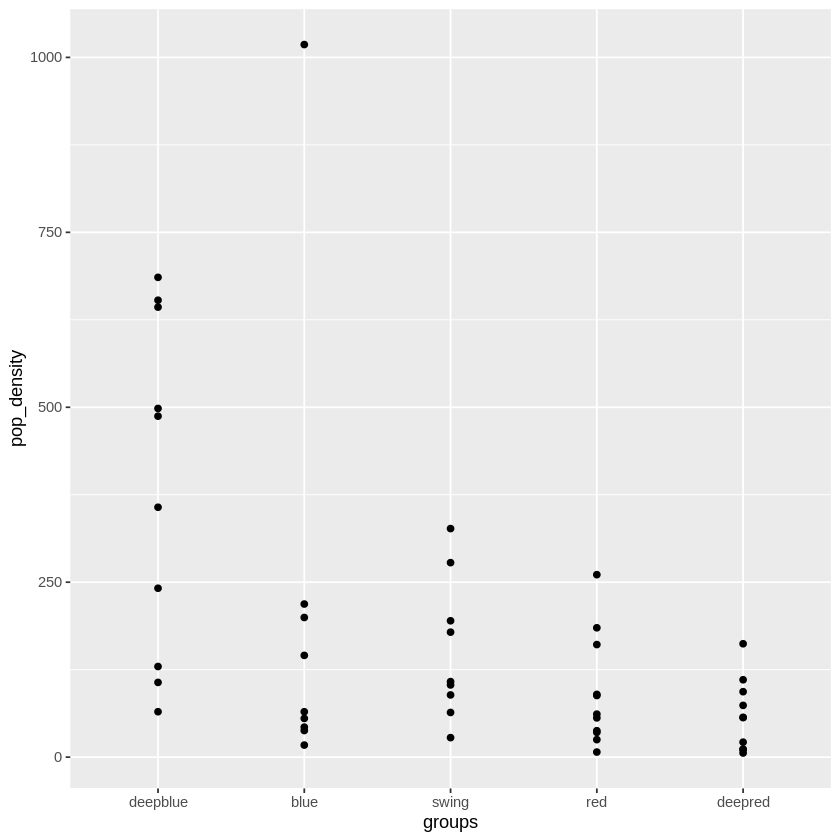

In [25]:
ggplot( Statedf3, aes(x=groups, y=pop_density)) + geom_point()

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


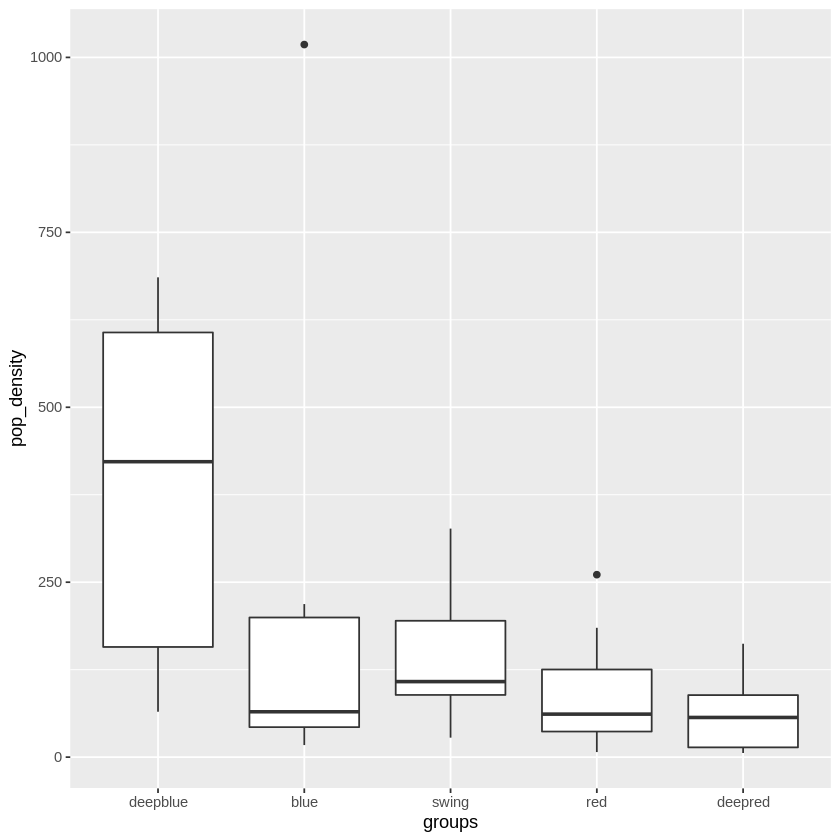

In [26]:
ggplot( Statedf3, aes(x=groups, y=pop_density)) + geom_boxplot()

In [27]:
deepred_pop_densities <- 
    Statedf3 %>% filter( groups == "deepred") %>% select( pop_density)

deepblue_pop_densities <- 
    Statedf3 %>% filter( groups == "deepblue") %>% select( pop_density)

t.test( deepblue_pop_densities, deepred_pop_densities, alternative = "greater")


	Welch Two Sample t-test

data:  deepblue_pop_densities and deepred_pop_densities
t = 4.2055, df = 9.8139, p-value = 0.0009447
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 185.4621      Inf
sample estimates:
mean of x mean of y 
386.70632  60.29845 


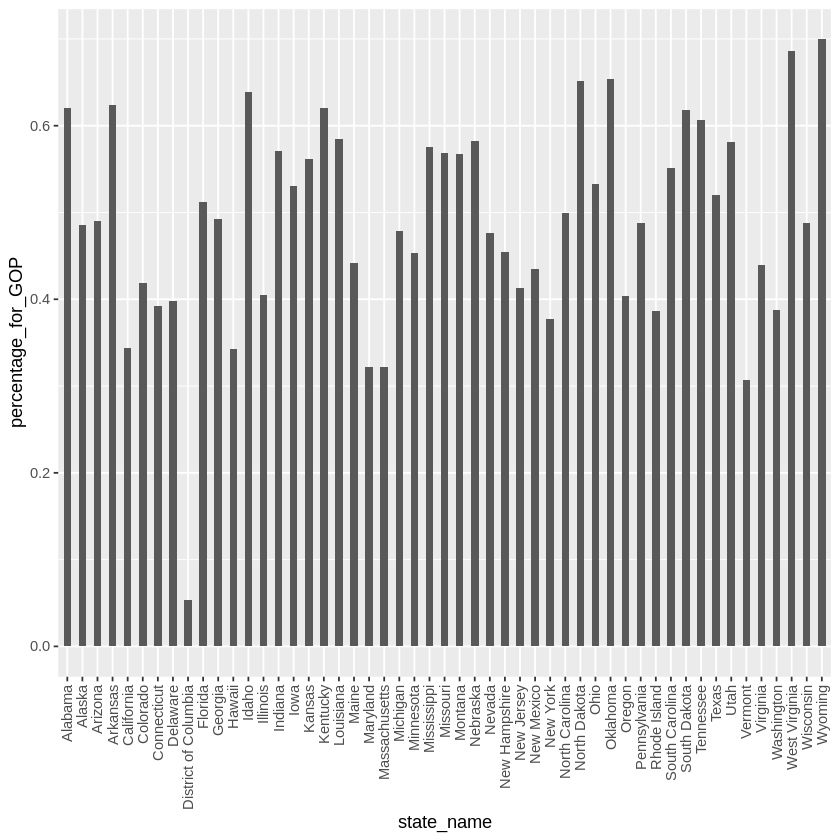

In [28]:
ggplot(Statedf, aes(x=state_name, y=percentage_for_GOP)) + geom_bar(stat='identity', width=.5)+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

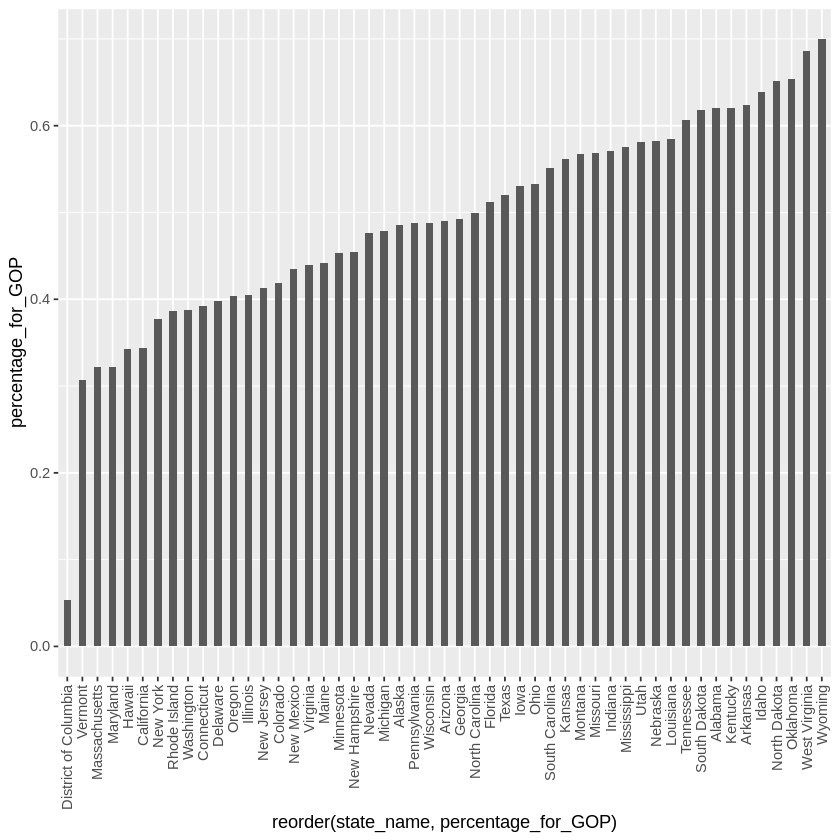

In [29]:
ggplot(Statedf, aes(x=reorder(state_name, percentage_for_GOP), y=percentage_for_GOP)) + geom_bar(stat='identity', width=.5)+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))